In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/kc_house_data.csv')

In [64]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [66]:
# univariate analysis
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [67]:
df['date'] = pd.to_datetime(df['date'])

<Axes: xlabel='date'>

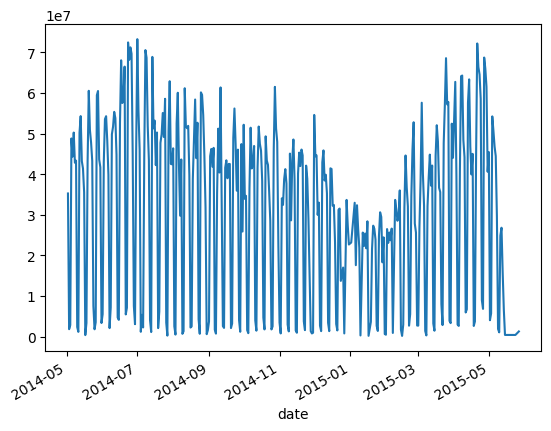

In [68]:
df.groupby('date')['price'].sum().sort_index().plot()
#mistaken

<Axes: xlabel='date'>

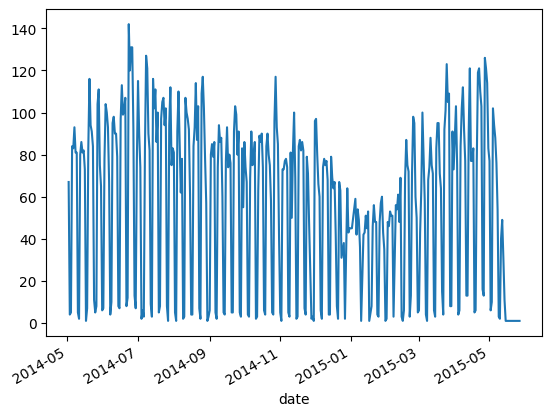

In [69]:
df.groupby('date')['price'].count().sort_index().plot()

In [70]:
df['price_per_sqft'] = df['price']/df['sqft_living']

<Axes: xlabel='date'>

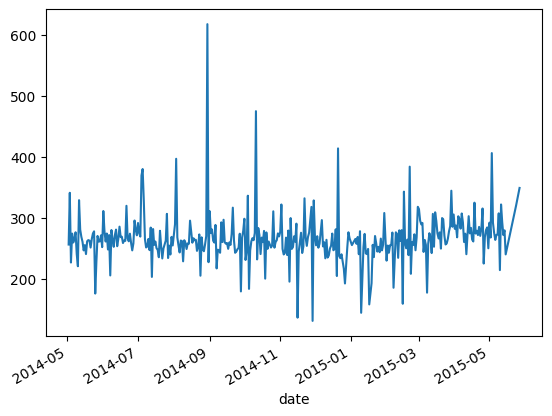

In [71]:
df.groupby('date')['price_per_sqft'].mean().sort_index().plot()

<Axes: xlabel='date'>

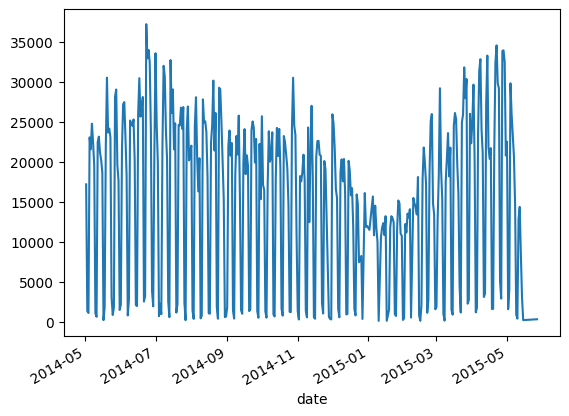

In [72]:
df.groupby('date')['price_per_sqft'].sum().sort_index().plot()

In [73]:
df.groupby('date')['price_per_sqft'].mean().sort_values()

date
2014-11-29    131.836687
2014-11-16    137.122567
2015-01-10    145.089286
2015-01-17    158.783784
2015-02-15    159.854015
                 ...    
2014-08-03    397.058824
2015-05-03    406.354663
2014-12-21    414.030372
2014-10-11    474.941358
2014-08-30    617.307692
Name: price_per_sqft, Length: 372, dtype: float64

In [74]:
df.set_index('date').loc['2014-08-30']

id                6.819100e+09
price             6.420000e+05
bedrooms          3.000000e+00
bathrooms         1.000000e+00
sqft_living       1.040000e+03
sqft_lot          4.480000e+03
floors            1.000000e+00
waterfront        0.000000e+00
view              0.000000e+00
condition         3.000000e+00
grade             7.000000e+00
sqft_above        8.700000e+02
sqft_basement     1.700000e+02
yr_built          1.924000e+03
yr_renovated      0.000000e+00
zipcode           9.810900e+04
lat               4.764610e+01
long             -1.223560e+02
sqft_living15     1.730000e+03
sqft_lot15        4.200000e+03
price_per_sqft    6.173077e+02
Name: 2014-08-30 00:00:00, dtype: float64

In [75]:
df[(df['sqft_living'] >= 1000) & (df['sqft_living']<=1100)]['price'].mean()

322731.12790697673

In [76]:
df.set_index('date').resample('M')['price_per_sqft'].mean()

/var/folders/pc/8bwtdgcn6797gk_s0_dg_qk80000gn/T/ipykernel_88476/3393454466.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('date').resample('M')['price_per_sqft'].mean()


date
2014-05-31    263.485471
2014-06-30    264.820869
2014-07-31    259.663075
2014-08-31    259.835918
2014-09-30    259.670146
2014-10-31    262.770101
2014-11-30    258.535804
2014-12-31    254.580748
2015-01-31    256.747731
2015-02-28    259.595072
2015-03-31    273.788626
2015-04-30    278.696695
2015-05-31    284.410837
Freq: ME, Name: price_per_sqft, dtype: float64

In [77]:
# generate a new variable which is the average by zipcode
df.groupby('zipcode')['price_per_sqft'].mean()

zipcode
98001    151.387938
98002    151.174091
98003    157.113414
98004    475.435611
98005    314.929231
            ...    
98177    292.918745
98178    189.172528
98188    169.007306
98198    178.428610
98199    376.546345
Name: price_per_sqft, Length: 70, dtype: float64

In [78]:
avg_price_zipcode = df.groupby('zipcode')['price_per_sqft'].mean().to_dict()

In [79]:
df['zip_price_per_sqft'] = df['zipcode'].map(avg_price_zipcode)

In [80]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,zip_price_per_sqft
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,188.050847,189.172528
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,209.338521,282.471664
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,233.766234,225.143085
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,308.163265,337.218034
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,303.571429,265.671342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,235.294118,369.841013
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,173.160173,225.491431
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,394.216667,312.241854
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,250.000000,251.572289


In [81]:
df['compare_to_avg'] = df['price_per_sqft'] - df['zip_price_per_sqft']

In [82]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,zip_price_per_sqft,compare_to_avg
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,188.050847,189.172528,-1.121681
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,209.338521,282.471664,-73.133142
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,233.766234,225.143085,8.623148
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,308.163265,337.218034,-29.054769
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,303.571429,265.671342,37.900086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,235.294118,369.841013,-134.546895
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,173.160173,225.491431,-52.331258
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,394.216667,312.241854,81.974813
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,250.000000,251.572289,-1.572289


<Axes: ylabel='compare_to_avg'>

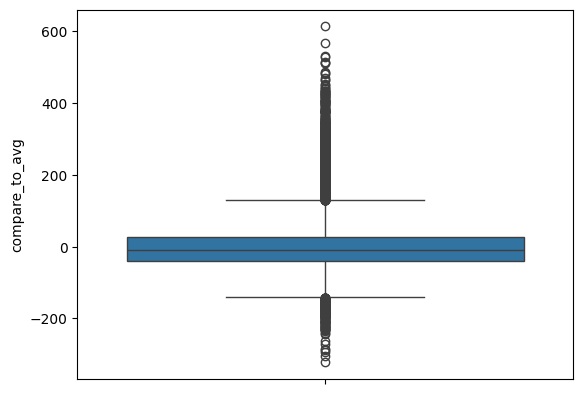

In [83]:
sns.boxplot(df['compare_to_avg'])

In [84]:
def value(x):
    if x>0:
        return "bad investment"
    elif x ==0:
        return "fair investment"
    elif x<0:
        return "good investment"

In [85]:
df['investment_type'] = df['compare_to_avg'].apply(value)

In [86]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,zip_price_per_sqft,compare_to_avg,investment_type
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,188.050847,189.172528,-1.121681,good investment
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,209.338521,282.471664,-73.133142,good investment
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,233.766234,225.143085,8.623148,bad investment
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,308.163265,337.218034,-29.054769,good investment
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,303.571429,265.671342,37.900086,bad investment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,98103,47.6993,-122.346,1530,1509,235.294118,369.841013,-134.546895,good investment
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,98146,47.5107,-122.362,1830,7200,173.160173,225.491431,-52.331258,good investment
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,98144,47.5944,-122.299,1020,2007,394.216667,312.241854,81.974813,bad investment
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,98027,47.5345,-122.069,1410,1287,250.000000,251.572289,-1.572289,good investment


In [87]:
def rolling_avg(group):
    group = group.sort_values('date')
    rolling_avg = group.set_index('date')['price_per_sqft'].rolling('90D').mean().shift()
    group['rolling_avg'] = rolling_avg.values
    return group

In [88]:
df = df.groupby('zipcode').apply(rolling_avg).reset_index(drop=True)

/var/folders/pc/8bwtdgcn6797gk_s0_dg_qk80000gn/T/ipykernel_88476/2836224715.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('zipcode').apply(rolling_avg).reset_index(drop=True)


In [89]:
df[df['zipcode'] == 98001].sort_values('date')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,zip_price_per_sqft,compare_to_avg,investment_type,rolling_avg
0,3328500250,2014-05-02,285000.0,4,2.50,2200,9397,2.0,0,0,...,98001,47.3406,-122.269,2310,9176,129.545455,151.387938,-21.842483,good investment,NaN
1,6143600580,2014-05-05,184000.0,3,1.75,1490,10125,1.0,0,0,...,98001,47.3075,-122.284,2488,4981,123.489933,151.387938,-27.898005,good investment,129.545455
2,3329520410,2014-05-05,245000.0,3,1.75,1920,9306,1.0,0,0,...,98001,47.3319,-122.267,1860,8458,127.604167,151.387938,-23.783771,good investment,126.517694
3,4012800010,2014-05-06,360000.0,4,2.00,2680,18768,1.0,0,0,...,98001,47.3182,-122.279,1230,15750,134.328358,151.387938,-17.059579,good investment,126.879851
4,7696630080,2014-05-06,197000.0,3,1.75,1690,7735,1.0,0,0,...,98001,47.3324,-122.280,1580,7503,116.568047,151.387938,-34.819890,good investment,128.741978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,302000375,2015-05-06,250000.0,3,2.00,1050,18304,1.0,0,0,...,98001,47.3206,-122.269,1690,15675,238.095238,151.387938,86.707301,bad investment,159.240375
357,2895550330,2015-05-06,290000.0,3,2.50,1600,6848,2.0,0,0,...,98001,47.3303,-122.271,1700,7210,181.250000,151.387938,29.862062,bad investment,157.932271
359,2895550050,2015-05-07,280000.0,3,2.50,1550,4486,2.0,0,0,...,98001,47.3299,-122.269,1700,4487,180.645161,151.387938,29.257224,bad investment,160.136453
360,3751600409,2015-05-08,510000.0,4,2.50,4073,17334,2.0,0,0,...,98001,47.2949,-122.270,1780,9625,125.214829,151.387938,-26.173108,good investment,160.366888


In [90]:
df['above/below'] = df['price_per_sqft'] - df['avg']

KeyError: 'avg'